In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
# Load a sample dataset

xgb_nse = pd.read_csv('/home/jothammasila/Projects/Datasets/nse.csv')

#Drop columns
columns_drop = ['Change','Change%','Code','Name','Volume','Adjusted Price']
xgb_nse = xgb_nse.drop(columns_drop, axis=1)


In [12]:
xgb_nse = xgb_nse.dropna()
xgb_nse.head()

,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous
0,3-Jan-22,10,15,13.5,13.8,13.5,13.5
1,3-Jan-22,355,427,385,385,385,385
2,3-Jan-22,80,101,99.5,99.5,99.5,95.5
3,3-Jan-22,260,360,320,320,320,320
4,3-Jan-22,16.75,22.6,18.7,18.7,18.7,18.7


In [13]:
columns_to_float = ['12m Low',	'12m High',	'Day Low',	'Day High',	'Day Price', 'Previous']
# convert to type float
# Convert each value in the specified columns to float
xgb_nse[columns_to_float] = xgb_nse[columns_to_float].apply(lambda x: pd.to_numeric(x, errors='coerce'))


In [14]:
# Create a target variable based on 'Day Low' and 'Day High'
# For example, you can create a binary target indicating whether the price increased or not
xgb_nse['PriceChange'] = (xgb_nse['Day High'] > xgb_nse['Day Low']).astype(int)

In [15]:
# Features (X) and target variable (y)
X = xgb_nse[['12m Low', '12m High', 'Day Price', 'Previous']]
y = xgb_nse['PriceChange']

In [16]:
xgb_nse.dropna()
xgb_nse.describe()

,12m Low,12m High,Day Low,Day High,Day Price,Previous,PriceChange
count,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6732.000000
mean,38.147616,52.438797,44.517934,44.970047,44.716726,44.727577,0.537730
std,80.388324,104.301068,91.719464,92.280648,91.968432,91.977711,0.498611
min,0.170000,0.270000,0.170000,0.180000,0.170000,0.170000,0.000000
25%,3.260000,4.530000,3.830000,3.830000,3.830000,3.830000,0.000000
50%,9.000000,13.225000,10.400000,10.400000,10.400000,10.400000,1.000000
75%,24.600000,42.200000,35.000000,36.000000,35.462500,35.462500,1.000000
max,420.000000,512.000000,500.000000,512.000000,509.000000,509.000000,1.000000


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Define the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

In [19]:
# Train the model
model.fit(X_train, y_train)
print(len(y_test))
print(len(X_test))

1347
1347


In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8789903489235338


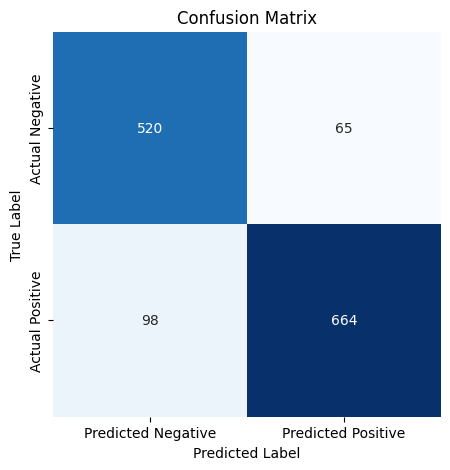

In [22]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

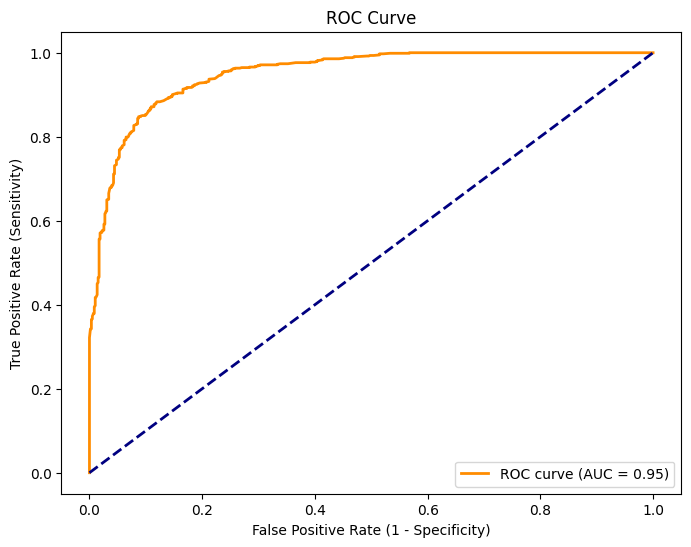

In [23]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Cross-Validation

##### Cross-validation is a crucial technique for assessing the performance of a machine learning model and ensuring that its performance metrics are robust and not dependent on a particular train-test split. In XGBoost model, you can use cross-validation to estimate the model's performance across multiple folds of the data.

In [26]:

# Define the cross-validation strategy (StratifiedKFold for binary classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Display cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))
pd.DataFrame(cv_scores,columns=['CV_Scores'])

,CV_Scores
0,0.873051
1,0.876763
2,0.876672
3,0.869985
4,0.875929
